In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.misc
from skimage.transform import resize
import random

In [2]:
pca_data = np.genfromtxt('pca_dataset.txt', delimiter=' ')

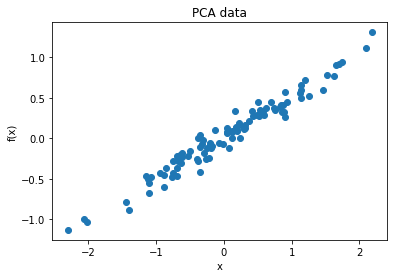

In [6]:
fig,ax = plt.subplots(1)

ax.set_title("PCA data")
ax.scatter(pca_data[:,0], pca_data[:,1])
ax.set_ylabel('f(x)')
ax.set_xlabel('x')

plt.savefig("task1_figures/task1_subtask1_1.png")
plt.show()

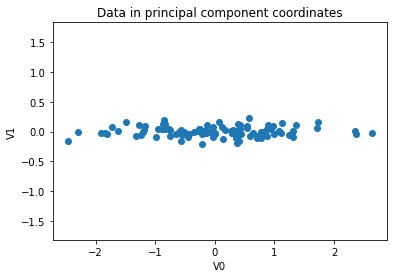

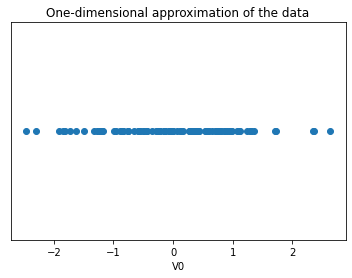

[9.94340494 0.82624201]
Energy of the first principal component: 9.943404944386826
Energy of the second principal component: 0.8262420091547046
Percentage of the total energy explained by using only the first principal component: 0.9931426561434291
Percentage of the total energy explained by using only the second principal component: 0.006857343856570892


In [9]:
# PCA

# Form the data matrix
pca_data = np.genfromtxt('pca_dataset.txt', delimiter=' ')

# Center matrix
data_mean = np.mean(pca_data, axis=0)
pca_data = pca_data - data_mean

# Decompose into singular vectors
u, s, vh = np.linalg.svd(pca_data, full_matrices=False)

# Calculate principal component cooridanates
pc_coordinates = np.dot(pca_data,np.transpose(vh))

# Plot data in principal component coordinates
fig,ax = plt.subplots(1)

ax.set_title("Data in principal component coordinates")
ax.scatter(pc_coordinates[:,0], pc_coordinates[:,1])
ax.set_ylabel('V1')
ax.set_xlabel('V0')

plt.axis('equal')
plt.savefig("task1_figures/task1_subtask1_2.png")
plt.show()

# Approximated one-dimensional subspace of the data would consist of only the first principal component.
# That is basically points on a single line.
# Plot one-dimensional approximation
fig,ax = plt.subplots(1)

ax.set_title("One-dimensional approximation of the data")
ax.scatter(pc_coordinates[:,0],np.zeros(pc_coordinates[:,0].shape))
ax.set_xlabel('V0')
ax.axes.get_yaxis().set_visible(False)

plt.savefig("task1_figures/task1_subtask1_3.png")
plt.show()

# Energy contained in principal components
print(s)
print("Energy of the first principal component: {}".format(s[0]))
print("Energy of the second principal component: {}".format(s[1]))
print("Percentage of the total energy explained by using only the first principal component: {}".format(s[0]**2/(s[0]**2+s[1]**2)))
print("Percentage of the total energy explained by using only the second principal component: {}".format(s[1]**2/(s[0]**2+s[1]**2)))


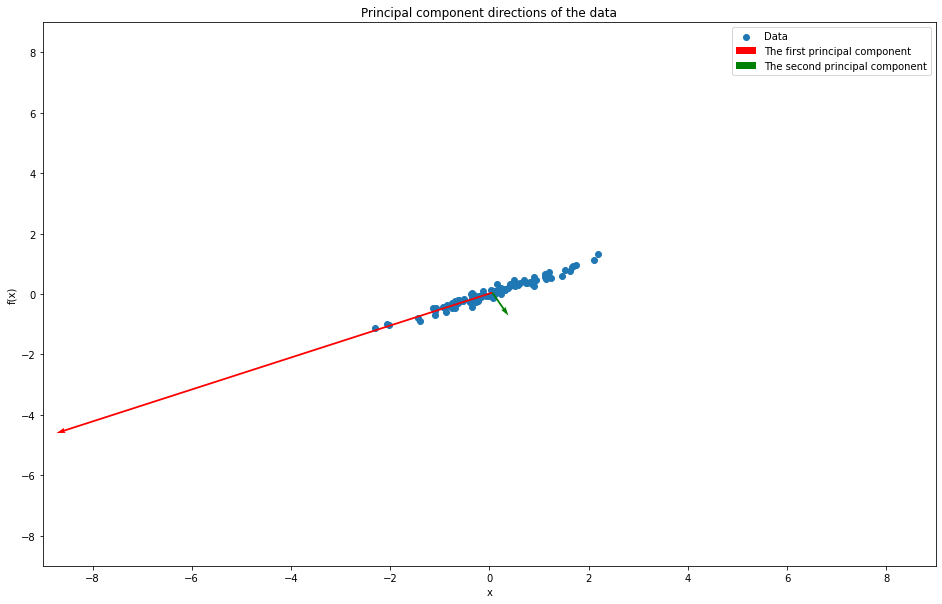

In [8]:
# plot two principal components on the data

pca_data = np.genfromtxt('pca_dataset.txt', delimiter=' ')

fig,ax = plt.subplots(1)

fig.set_size_inches(16, 10)

ax.set_title("Principal component directions of the data")
ax.scatter(pca_data[:,0], pca_data[:,1], label="Data")
length_0 = np.sqrt((vh[0][0] - data_mean[0])**2 + (vh[0][1] - data_mean[1])**2)
length_1 = np.sqrt((vh[1][0] - data_mean[0])**2 + (vh[1][1] - data_mean[1])**2)

ax.quiver([data_mean[0]],[data_mean[1]],[(vh[0][0]-data_mean[0])*s[0]/length_0],[(vh[0][1]-data_mean[1])*s[0]/length_0],
          angles='xy', scale_units='xy', scale=1, width=0.002, color='r', label="The first principal component")
ax.quiver([data_mean[0]],[data_mean[1]],[(vh[1][0]-data_mean[0])*s[1]/length_1],[(vh[1][1]-data_mean[1])*s[1]/length_1],
          angles='xy', scale_units='xy', scale=1, width=0.002, color='g', label="The second principal component")

ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_ylim(-9,9)
ax.set_xlim(-9,9)

plt.legend()
plt.savefig("task1_figures/task1_subtask1_4.png")
plt.show()

The percentage of the total energy explained by using 120 principal components: 0.9979609884458432
The percentage of the total energy explained by using 50 principal components: 0.9746083534614827
The percentage of the total energy explained by using 10 principal components: 0.8213206544431356


<Figure size 432x288 with 0 Axes>

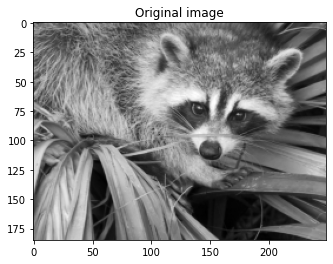

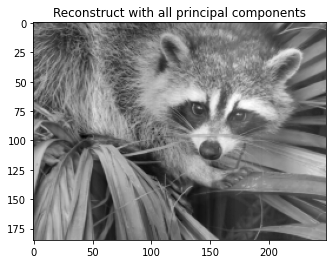

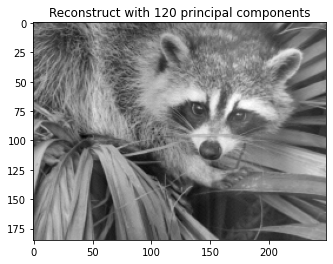

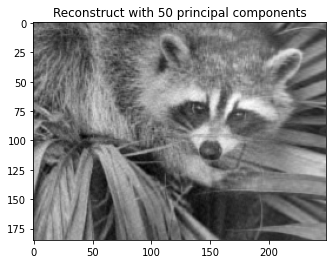

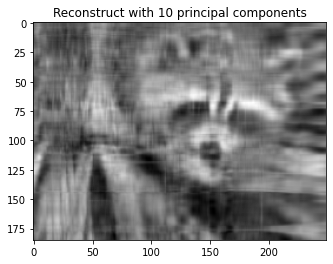

In [12]:
face = scipy.misc.face(gray=True)
plt.gray()

face = resize(face, (185,249))
plt.figure()
plt.title("Original image")
plt.imshow(face)

# Center matrix
face_mean = np.mean(face, axis=0)
face = face - face_mean

# Decompose into singular vectors
u, s, vh = np.linalg.svd(face, full_matrices=False)

# Form diagonal matrix from s
diag_s = np.diag(s)

# Calculate sum over all squared singular values (for energy calculations)
trace_s = np.sum(s**2)

# Reconstruct with all principal components
reconstruct_all = np.dot(np.dot(u,diag_s),vh)
plt.figure()
plt.title("Reconstruct with all principal components")
plt.imsave("task1_figures/task1_subtask2_1.png", reconstruct_all)
plt.imshow(reconstruct_all)

# Reconstruct with 120 principal components
diag_s[diag_s < s[119]] = 0
reconstruct_120 = np.dot(np.dot(u,diag_s),vh)
plt.figure()
plt.title("Reconstruct with 120 principal components")
plt.imsave("task1_figures/task1_subtask2_2.png", reconstruct_120)
plt.imshow(reconstruct_120)
s[s < s[119]] = 0
energy_120 = np.sum(diag_s**2) / trace_s
print("The percentage of the total energy explained by using 120 principal components: {}".format(energy_120))

# Reconstruct with 50 principal components
diag_s[diag_s < s[49]] = 0
reconstruct_50 = np.dot(np.dot(u,diag_s),vh)
plt.figure()
plt.title("Reconstruct with 50 principal components")
plt.imsave("task1_figures/task1_subtask2_3.png", reconstruct_50)
plt.imshow(reconstruct_50)
s[s < s[49]] = 0
energy_50 = np.sum(diag_s**2) / trace_s
print("The percentage of the total energy explained by using 50 principal components: {}".format(energy_50))

# Reconstruct with 10 principal components
diag_s[diag_s < s[9]] = 0
reconstruct_10 = np.dot(np.dot(u,diag_s),vh)
plt.figure()
plt.title("Reconstruct with 10 principal components")
plt.imsave("task1_figures/task1_subtask2_4.png", reconstruct_10)
plt.imshow(reconstruct_10)
s[s < s[9]] = 0
energy_10 = np.sum(diag_s**2) / trace_s
print("The percentage of the total energy explained by using 10 principal components: {}".format(energy_10))

In [14]:
dmap_data = np.genfromtxt('data_DMAP_PCA_vadere.txt', delimiter=' ')

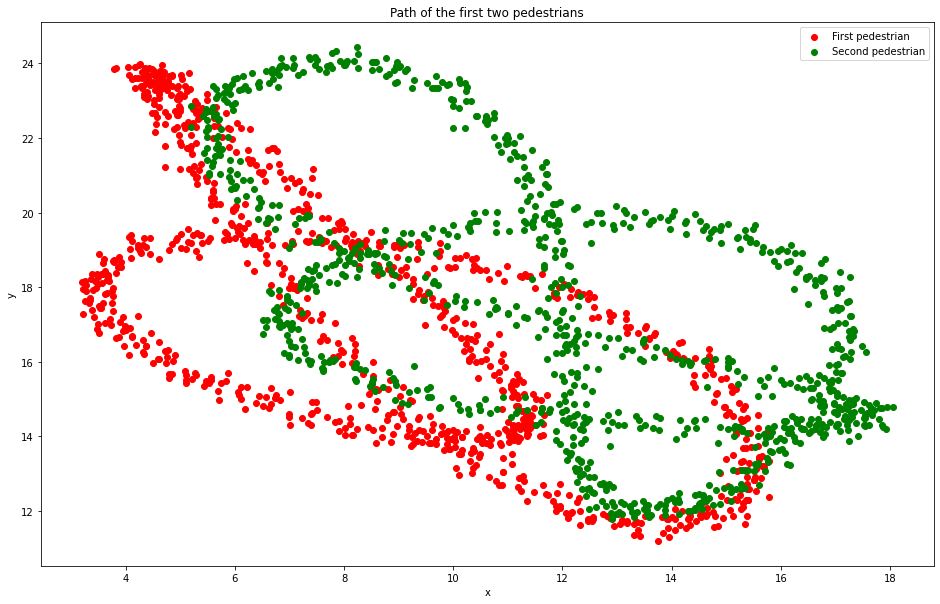

In [15]:
fig,ax = plt.subplots(1)
fig.set_size_inches(16, 10)

ax.set_title("Path of the first two pedestrians")
#ax.plot(dmap_data[:,0], dmap_data[:,1], color='r', label="First pedestrian")
ax.scatter(dmap_data[:,0], dmap_data[:,1], color='r', label="First pedestrian")
ax.scatter(dmap_data[:,2], dmap_data[:,3], color='g', label="Second pedestrian")

#ax.plot(dmap_data[:,2], dmap_data[:,3], color='g', label="Second pedestrian")
ax.set_ylabel('y')
ax.set_xlabel('x')

plt.legend()
plt.savefig("task1_figures/task1_subtask3_1.png")
plt.show()

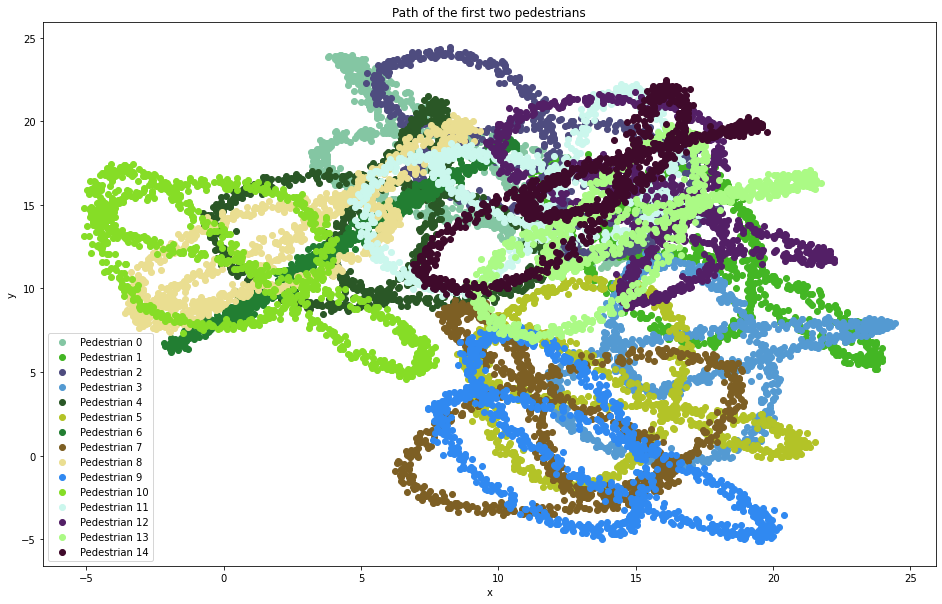

In [5]:
fig,ax = plt.subplots(1)
fig.set_size_inches(16, 10)

ax.set_title("Path of the first two pedestrians")
#ax.plot(dmap_data[:,0], dmap_data[:,1], color='r', label="First pedestrian")

for i in range(15):
    ax.scatter(dmap_data[:,i], dmap_data[:,i+1], color=(random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)), label="Pedestrian {}".format(i))

#ax.plot(dmap_data[:,2], dmap_data[:,3], color='g', label="Second pedestrian")
ax.set_ylabel('y')
ax.set_xlabel('x')

plt.legend()
plt.show()

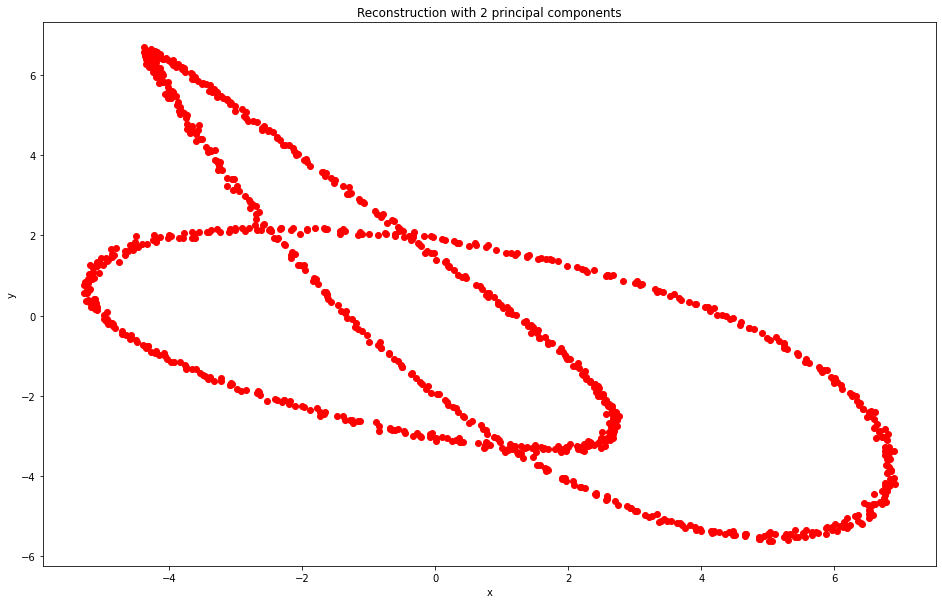

[421.89281473 376.00276446 235.82660239   7.27414912   7.18790728
   7.08221189   6.98504259   6.92195056   6.87602132   6.69010057
   6.60431918   6.5776671    6.5347474    6.48457864   6.41405374
   6.38938733   6.30610536   6.24658554   6.15138287   6.08497605
   6.06022038   5.97522649   5.88667074   5.82624075   5.72393202
   5.68615899   5.683921     5.6002173    5.52269316   5.28134746]
The percentage of the total energy explained by using 3 principal components: 0.9971310341299296
The percentage of the total energy explained by using 2 principal components: 0.849246422606375


In [17]:
# Center matrix
dmap_mean = np.mean(dmap_data, axis=0)
dmap_data = dmap_data - dmap_mean

# Decompose into singular vectors
u, s, vh = np.linalg.svd(dmap_data, full_matrices=False)

# Form diagonal matrix from s
diag_s = np.diag(s)

# Calculate sum over all squared singular values (for energy calculations)
trace_s = np.sum(s**2)

# Reconstruct with 2 principal components
diag_s[diag_s < s[2]] = 0
reconstruct_2 = np.dot(np.dot(u,diag_s),vh)

# Plot reconstruction
fig,ax = plt.subplots(1)
fig.set_size_inches(16, 10)

ax.set_title("Reconstruction with 2 principal components")
#ax.plot(dmap_data[:,0], dmap_data[:,1], color='r', label="First pedestrian")

ax.scatter(reconstruct_2[:,0], reconstruct_2[:,1], color='r')

#ax.plot(dmap_data[:,2], dmap_data[:,3], color='g', label="Second pedestrian")
ax.set_ylabel('y')
ax.set_xlabel('x')

plt.savefig("task1_figures/task1_subtask3_2.png")
plt.show()

print(s)
s[s < s[2]] = 0
energy_3 = np.sum(s**2) / trace_s
print("The percentage of the total energy explained by using 3 principal components: {}".format(energy_3))

s[s < s[1]] = 0
energy_2 = np.sum(s**2) / trace_s
print("The percentage of the total energy explained by using 2 principal components: {}".format(energy_2))
